In [42]:
# Загрузка данных
import pandas as pd

column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'Class']

# Загружаем данные из файла CSV
data = pd.read_csv("data_banknote_authentication.csv", names=column_names)

# Первичный анализ данных
print(data.head())  # Просмотр первых нескольких строк данных
print(data.info())  # Информация о типах данных и наличии пропущенных значений
print(data.describe())  # Статистические характеристики данных

   variance  skewness  curtosis  entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
          variance     skewness     curtosis      entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.

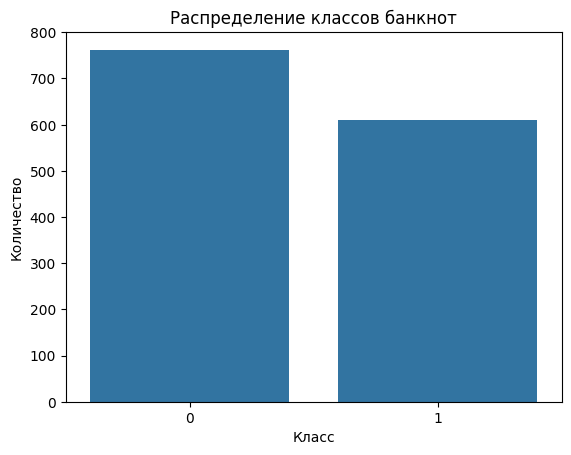

In [29]:
# Визуализация распределения классов банкнот
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=data)
plt.title('Распределение классов банкнот')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

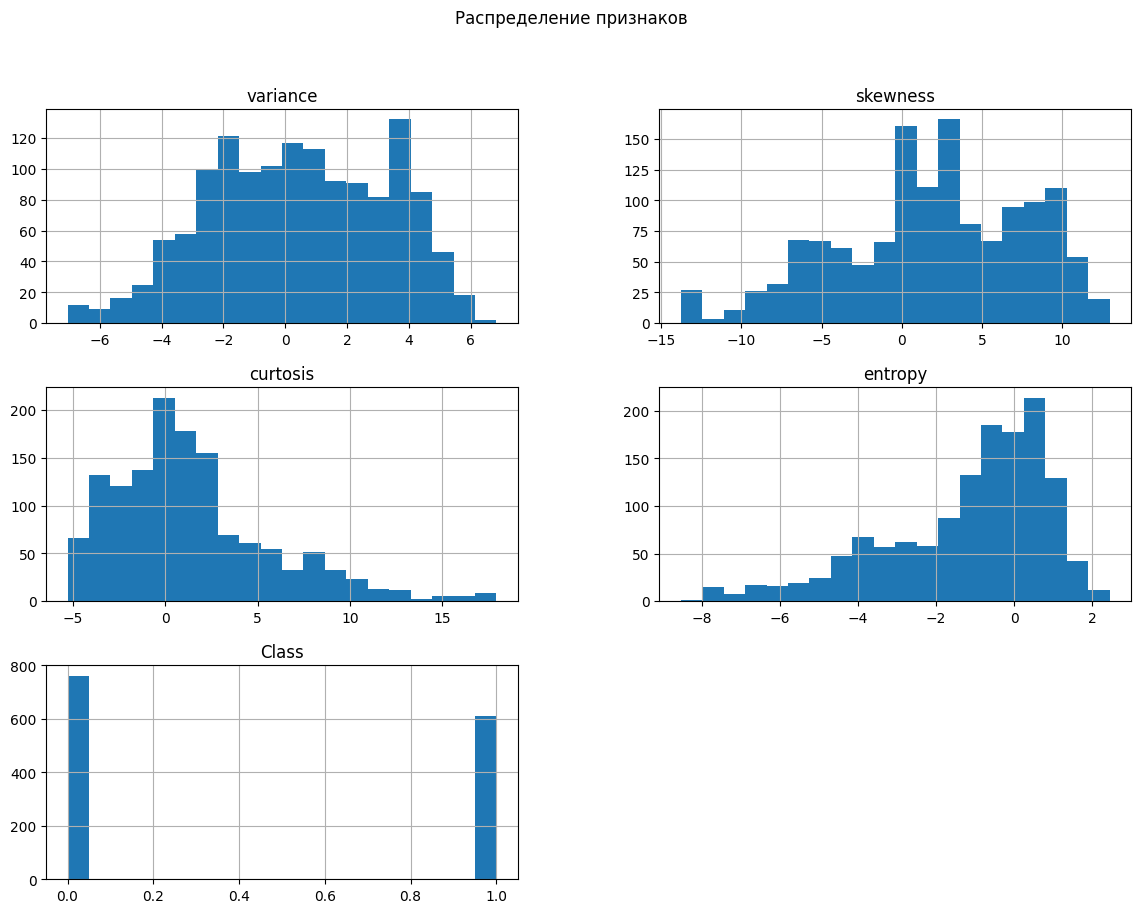

In [30]:
# Гистограммы распределения признаков
data.hist(bins=20, figsize=(14, 10))
plt.suptitle('Распределение признаков')
plt.show()

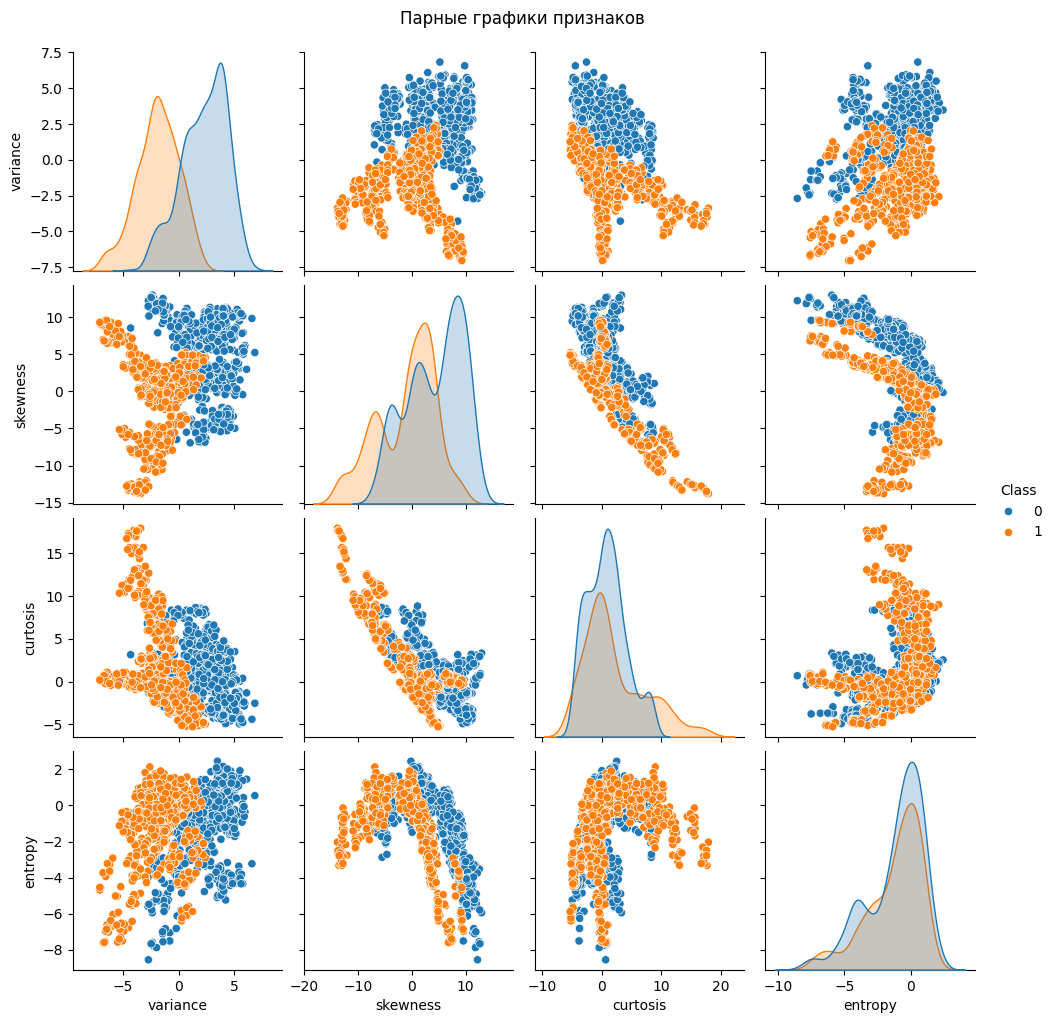

In [31]:
# Парные графики для визуализации взаимосвязей между признаками
sns.pairplot(data, hue='Class')
plt.suptitle('Парные графики признаков', y=1.02)
plt.show()

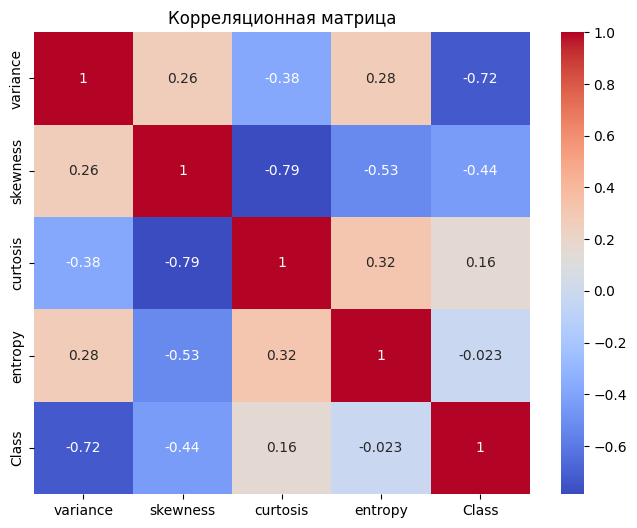

In [32]:
# Корреляционная матрица для анализа линейных зависимостей между признаками
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [33]:
# Преобразование данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Проверка пропущенных значений
display(data.isnull().sum())

# Разделение данных на обучающую и тестовую выборки
X = data.drop('Class', axis=1)  # Признаки
y = data['Class']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных для улучшения производительности моделей
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

variance    0
skewness    0
curtosis    0
entropy     0
Class       0
dtype: int64

In [34]:
# Преобразование данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на обучающую и тестовую выборки
X = data.drop('Class', axis=1)  # Признаки
y = data['Class']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных для улучшения производительности моделей
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Проверка размеров выборок
print(f"Размер обучающей выборки (признаки): {X_train_scaled.shape}")
print(f"Размер обучающей выборки (целевая переменная): {y_train.shape}")
print(f"Размер тестовой выборки (признаки): {X_test_scaled.shape}")
print(f"Размер тестовой выборки (целевая переменная): {y_test.shape}")

# Проверка первых нескольких строк масштабированных данных
print("\nПервые несколько строк масштабированных данных:")
display(pd.DataFrame(X_train_scaled, columns=X.columns).head())

# Проверка средних и стандартных отклонений масштабированных данных
print("\nСредние и стандартные отклонения масштабированных данных:")
display(pd.DataFrame(X_train_scaled, columns=X.columns).describe().loc[['mean', 'std']])

Размер обучающей выборки (признаки): (1097, 4)
Размер обучающей выборки (целевая переменная): (1097,)
Размер тестовой выборки (признаки): (275, 4)
Размер тестовой выборки (целевая переменная): (275,)

Первые несколько строк масштабированных данных:


,variance,skewness,curtosis,entropy
0,-0.639156,1.805580,-0.188365,-3.050968
1,0.821889,0.852399,-0.594078,0.603455
2,-1.657033,-1.633283,2.383862,-0.342355
3,1.728861,0.328631,-0.748077,1.084449
4,0.113973,0.205992,0.325092,0.534656



Средние и стандартные отклонения масштабированных данных:


,variance,skewness,curtosis,entropy
mean,1.619286e-17,1.295429e-17,-4.857858e-18,-5.991359e-17
std,1.000456e+00,1.000456e+00,1.000456e+00,1.000456e+00


In [35]:
# Обучение моделей с использованием библиотечных реализаций
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Оценка моделей
models = {
    'Logistic Regression': (y_pred_log_reg, log_reg),
    'SVM': (y_pred_svm, svm),
    'Random Forest': (y_pred_rf, rf),
    'KNN': (y_pred_knn, knn)
}

for name, (y_pred, model) in models.items():
    print(f'{name}:\n{classification_report(y_test, y_pred)}\n')

Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275


SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.

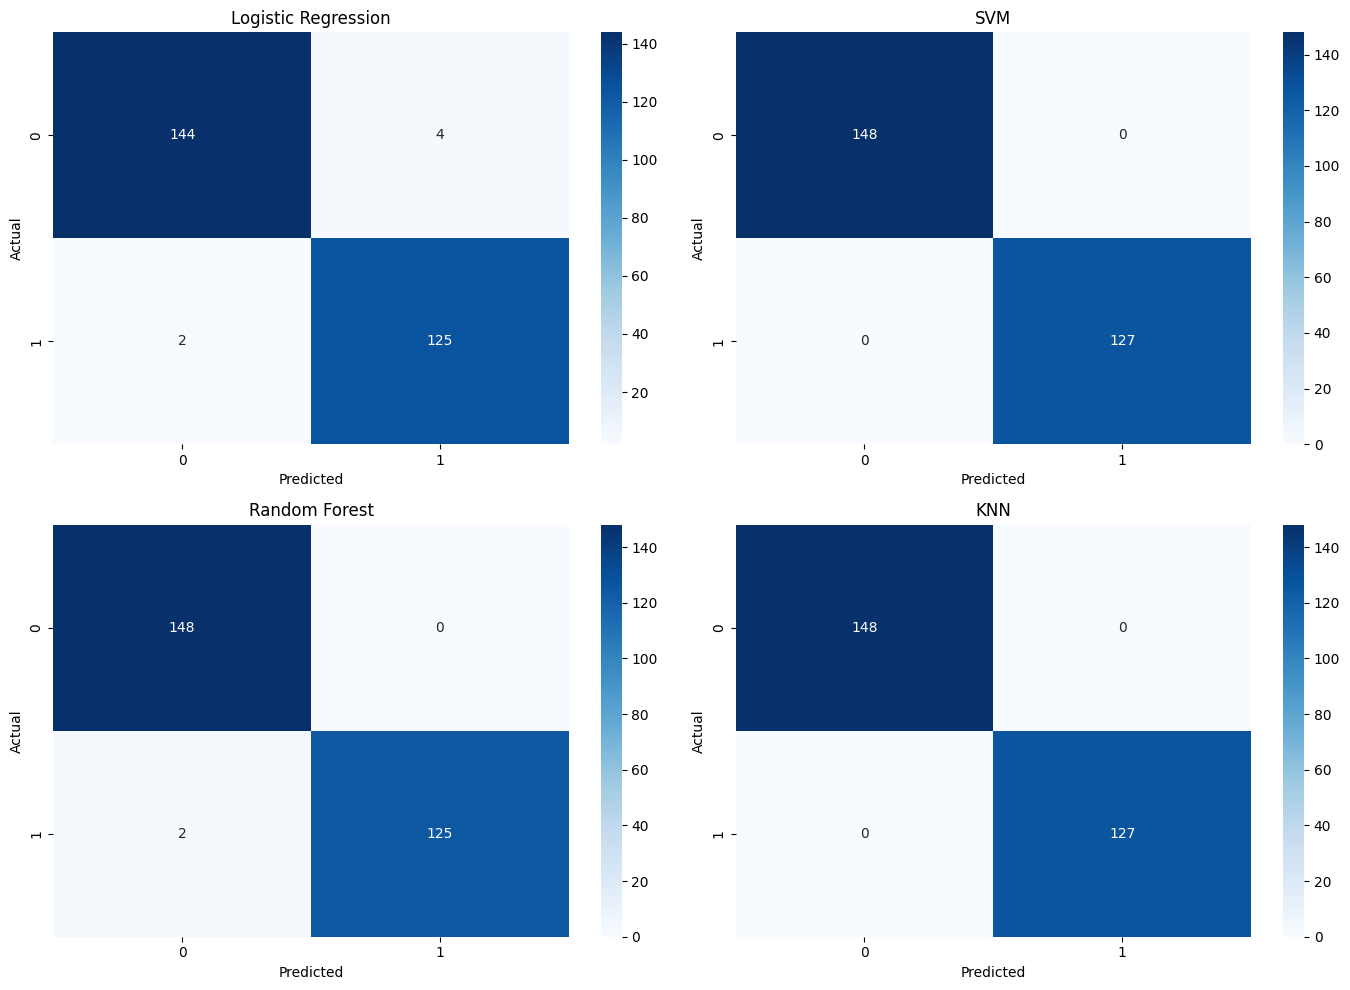

In [36]:
# Построение confusion matrices для всех моделей
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, (name, (y_pred, _)) in zip(axes.ravel(), models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01,

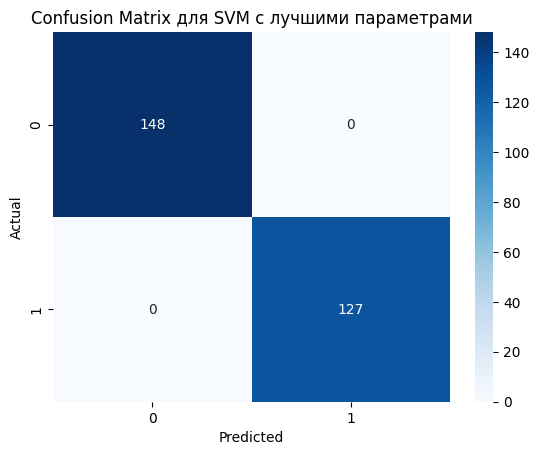

In [37]:
# Подбор гиперпараметров для SVM
from sklearn.model_selection import GridSearchCV

# Определяем сетку гиперпараметров для SVM
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)
print(f'Лучшие параметры для SVM: {grid.best_params_}')

# Обучение модели с лучшими параметрами
best_svm = grid.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_scaled)

# Оценка модели с лучшими параметрами
print(f'Оценка SVM с лучшими параметрами:\n{classification_report(y_test, y_pred_best_svm)}\n')

# Confusion matrix для лучшей модели SVM
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)
sns.heatmap(cm_best_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix для SVM с лучшими параметрами')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Custom KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275




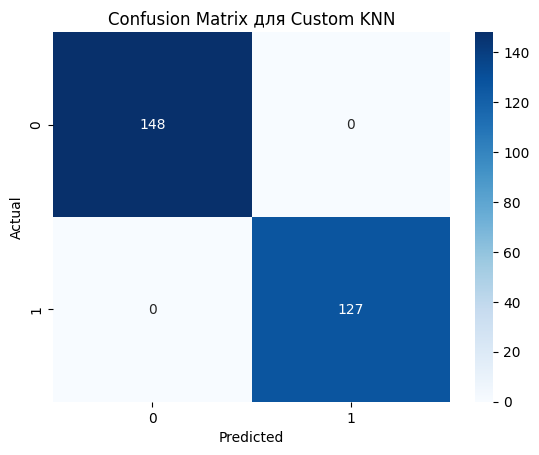

In [38]:
# Реализация собственного метода классификации (KNN)
import numpy as np

class CustomKNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)  # Преобразуем y_train в массив NumPy
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

# Обучение и оценка собственной модели
custom_knn = CustomKNN(k=3)
custom_knn.fit(X_train_scaled, y_train)
y_pred_custom_knn = custom_knn.predict(X_test_scaled)

print(f'Custom KNN:\n{classification_report(y_test, y_pred_custom_knn)}\n')

# Confusion matrix для собственной модели
cm_custom_knn = confusion_matrix(y_test, y_pred_custom_knn)
sns.heatmap(cm_custom_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix для Custom KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Оптимальное значение k: 1
Custom KNN с оптимальным k:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275




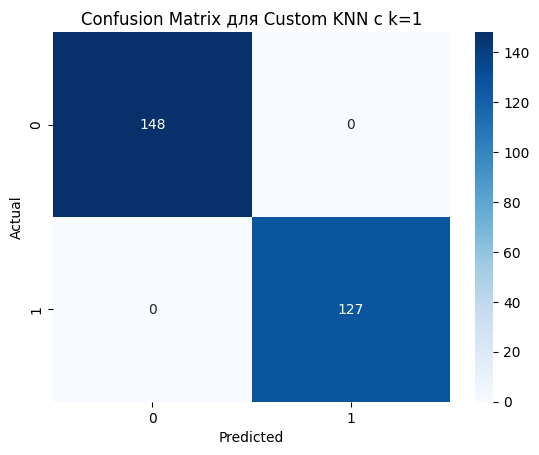

In [39]:
# Подбор гиперпараметра k для собственной модели KNN
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []

for k in k_values:
    custom_knn = CustomKNN(k=k)
    custom_knn.fit(X_train_scaled, y_train)
    y_pred = custom_knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Найдем оптимальное значение k
optimal_k = k_values[np.argmax(accuracies)]
print(f'Оптимальное значение k: {optimal_k}')

# Обучение модели с оптимальным k
best_custom_knn = CustomKNN(k=optimal_k)
best_custom_knn.fit(X_train_scaled, y_train)
y_pred_best_custom_knn = best_custom_knn.predict(X_test_scaled)

print(f'Custom KNN с оптимальным k:\n{classification_report(y_test, y_pred_best_custom_knn)}\n')

# Confusion matrix для лучшей модели Custom KNN
cm_best_custom_knn = confusion_matrix(y_test, y_pred_best_custom_knn)
sns.heatmap(cm_best_custom_knn, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix для Custom KNN с k={optimal_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275


SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.

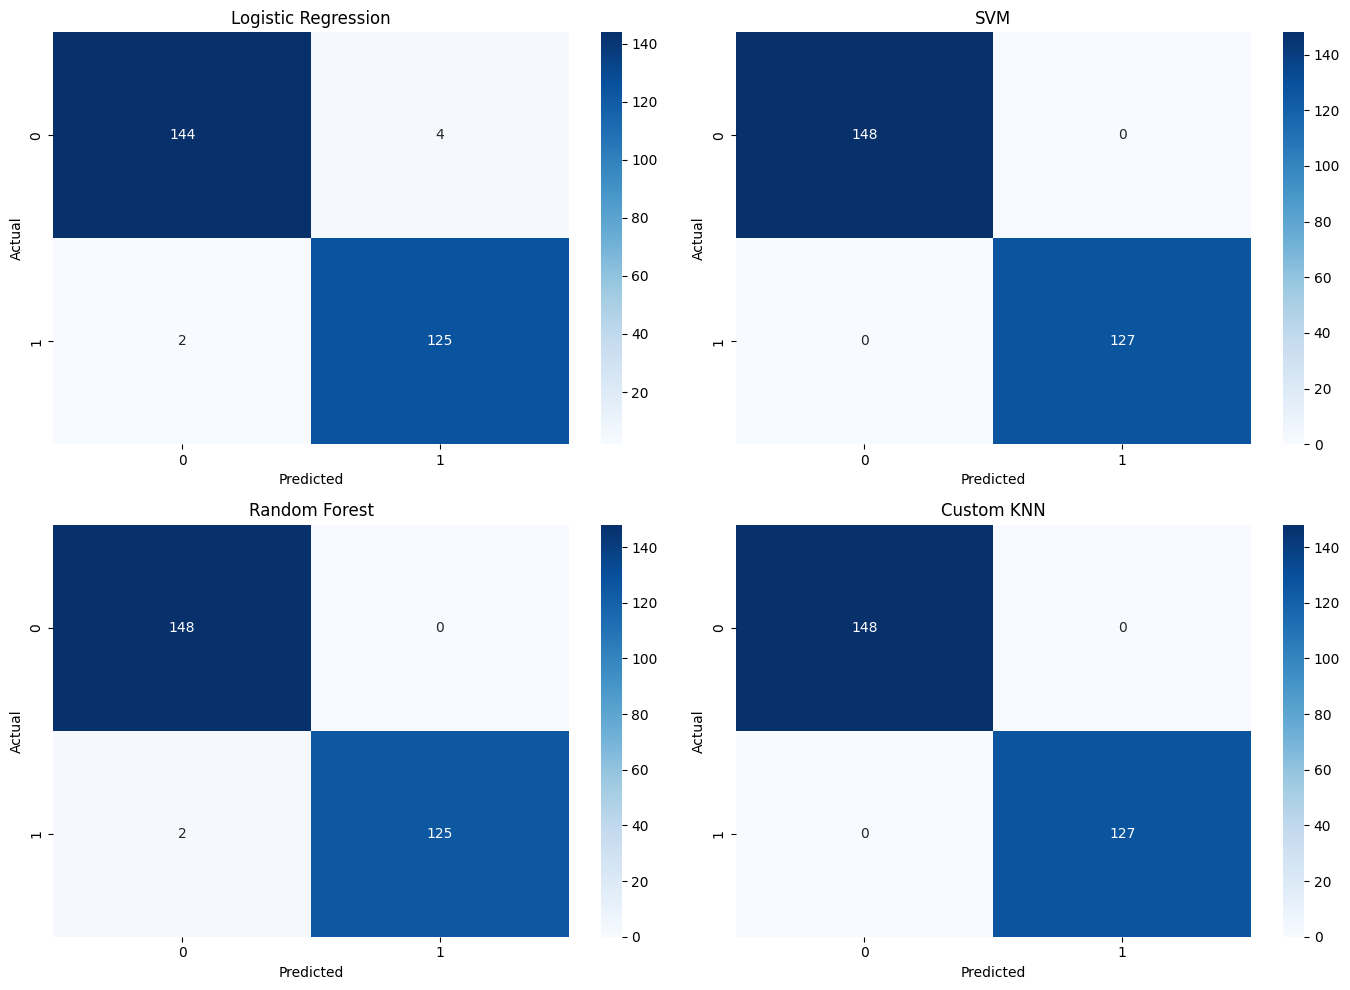

In [40]:
# Сравнение всех моделей
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# SVM
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Custom KNN с k=1
custom_knn = CustomKNN(k=1)
custom_knn.fit(X_train_scaled, y_train)
y_pred_custom_knn = custom_knn.predict(X_test_scaled)

# Оценка моделей
models = {
    'Logistic Regression': (y_pred_log_reg, log_reg),
    'SVM': (y_pred_svm, svm),
    'Random Forest': (y_pred_rf, rf),
    'Custom KNN': (y_pred_custom_knn, custom_knn)
}

for name, (y_pred, model) in models.items():
    print(f'{name}:\n{classification_report(y_test, y_pred)}\n')

# Построение confusion matrices для всех моделей
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Логистическая регрессия
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('SVM')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Custom KNN
cm_custom_knn = confusion_matrix(y_test, y_pred_custom_knn)
sns.heatmap(cm_custom_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Custom KNN')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Logistic Regression:


,precision,recall,f1-score
0,0.986301,0.972973,0.979592
1,0.968992,0.984252,0.976562



SVM:


,precision,recall,f1-score
0,1.0,1.0,1.0
1,1.0,1.0,1.0



Random Forest:


,precision,recall,f1-score
0,0.986667,1.000000,0.993289
1,1.000000,0.984252,0.992063



Custom KNN:


,precision,recall,f1-score
0,1.0,1.0,1.0
1,1.0,1.0,1.0


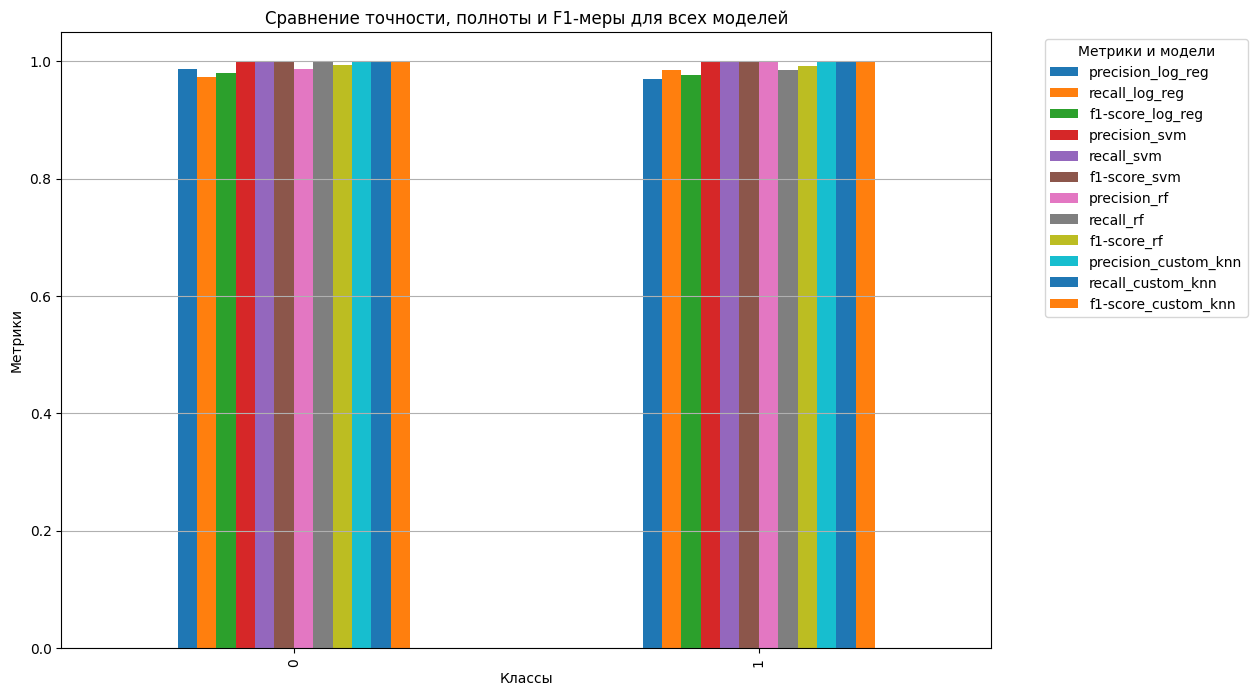

In [41]:
# Обобщение результатов и выводы
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Функция для извлечения метрик precision, recall и f1-score для каждого класса
def extract_metrics(report):
    metrics = {}
    for cls in report:
        if cls.isdigit():  # Извлекаем метрики только для классов 0 и 1
            metrics[cls] = {
                'precision': report[cls]['precision'],
                'recall': report[cls]['recall'],
                'f1-score': report[cls]['f1-score']
            }
    return pd.DataFrame(metrics).transpose()

# Логистическая регрессия
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)
metrics_log_reg = extract_metrics(report_log_reg)

# SVM
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
metrics_svm = extract_metrics(report_svm)

# Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
metrics_rf = extract_metrics(report_rf)

# Custom KNN
report_custom_knn = classification_report(y_test, y_pred_custom_knn, output_dict=True)
metrics_custom_knn = extract_metrics(report_custom_knn)

# Выводим отчеты о классификации для каждой модели отдельно
print("Logistic Regression:")
display(metrics_log_reg)
print("\nSVM:")
display(metrics_svm)
print("\nRandom Forest:")
display(metrics_rf)
print("\nCustom KNN:")
display(metrics_custom_knn)

# Построение bar plot для точности, полноты и F1-меры
metrics_df = pd.concat([
    metrics_log_reg.add_suffix('_log_reg'),
    metrics_svm.add_suffix('_svm'),
    metrics_rf.add_suffix('_rf'),
    metrics_custom_knn.add_suffix('_custom_knn')
], axis=1)

metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Сравнение точности, полноты и F1-меры для всех моделей')
plt.xlabel('Классы')
plt.ylabel('Метрики')
plt.ylim(0, 1.05)
plt.legend(title='Метрики и модели', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()